In [1]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [2]:
## Get working directory
PATH = os.getcwd()
## Path to save the embedding and checkpoints generated
LOG_DIR = PATH + '/project-tensorboard/log-1/'

In [3]:
PATH

'/home/sohiniroy/ML_examples'

In [4]:
LOG_DIR

'/home/sohiniroy/ML_examples/project-tensorboard/log-1/'

In [5]:
df = pd.read_csv("User_Journey_Based_Features.csv")

np.shape(df)

(1076360, 16)

In [6]:
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase,cluster
0,1,1,0.0,939.28,939.28,0,0,0,0,2019,11,Fr,EarlyMorning,0,1,0
1,1,1,0.0,202.30,202.30,0,0,0,0,2019,11,Sun,Afternoon,0,1,0
2,1,1,0.0,617.52,617.52,0,0,0,0,2019,11,Fr,Afternoon,0,1,0
3,1,1,0.0,89.58,89.58,0,0,0,0,2019,11,Sat,EarlyMorning,0,1,0
4,1,1,0.0,46.33,46.33,0,0,0,0,2019,11,Tue,EarlyMorning,0,1,0


In [7]:
#Make categorical columns as numerical
df['weekday']=df['weekday'].replace(['Mon','Tue','Wed','Thu','Fr','Sat','Sun'],[1,2,3,4,5,6,7])
df['timeOfDay']=df['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase,cluster
0,1,1,0.0,939.28,939.28,0,0,0,0,2019,11,5,2,0,1,0
1,1,1,0.0,202.30,202.30,0,0,0,0,2019,11,7,5,0,1,0
2,1,1,0.0,617.52,617.52,0,0,0,0,2019,11,5,5,0,1,0
3,1,1,0.0,89.58,89.58,0,0,0,0,2019,11,6,2,0,1,0
4,1,1,0.0,46.33,46.33,0,0,0,0,2019,11,2,2,0,1,0


In [12]:
#print shape(df[df.columns[0:199]]))
X1=np.array(df[df.columns[0:12]])
print(np.shape(df))
X=X1[0:100000,:]
#print(df.iloc[0:5,0:131])
y1=np.array(df[df.columns[13]]) #[12=Purchase, 13=Cluster]
y=y1[0:100000]
print(X[0:5,:])

(1076360, 16)
[[1.0000e+00 1.0000e+00 0.0000e+00 9.3928e+02 9.3928e+02 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 2.0190e+03 1.1000e+01 5.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00 2.0230e+02 2.0230e+02 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 2.0190e+03 1.1000e+01 7.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00 6.1752e+02 6.1752e+02 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 2.0190e+03 1.1000e+01 5.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00 8.9580e+01 8.9580e+01 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 2.0190e+03 1.1000e+01 6.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00 4.6330e+01 4.6330e+01 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 2.0190e+03 1.1000e+01 2.0000e+00]]


In [9]:
#version 1
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(labels, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for label in labels:
            f.write('{}\n'.format(label))


In [29]:
#version 2
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(df, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for index, row in df.iterrows():
            f.write('%s\n' %(row['model']))


In [10]:
META_DATA_FNAME = 'meta_ten.tsv'  # Labels will be stored here
EMBEDDINGS_TENSOR_NAME = 'sub_data_ten'
EMBEDDINGS_FPATH = os.path.join(LOG_DIR, EMBEDDINGS_TENSOR_NAME + '.ckpt')
STEP = 0

register_embedding(EMBEDDINGS_TENSOR_NAME, META_DATA_FNAME, LOG_DIR)
save_labels_tsv(y, META_DATA_FNAME, LOG_DIR)#version 1
#save_labels_tsv(df, META_DATA_FNAME, LOG_DIR)#version 2

In [11]:
tf.compat.v1.disable_eager_execution()
tensor_embeddings = tf.Variable(X, name=EMBEDDINGS_TENSOR_NAME)
sess = tf.compat.v1.InteractiveSession()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()
saver.save(sess, EMBEDDINGS_FPATH, STEP)
sess.close()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [58]:
# Next, to analyze composition of each cluster

In [13]:
column_values = df["cluster"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [14]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['cluster'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print(locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

1066615
2664
559
4621
1901


[9.909e+01 2.500e-01 5.000e-02 4.300e-01 1.800e-01]
[1.35 6.91 8.59 6.47 7.68]


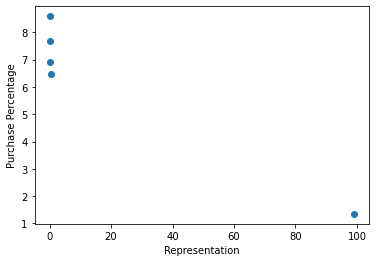

In [15]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [16]:
print(np.sum(purchase_percentage))

31.0


In [17]:
total_purchase=df.loc[df['Purchase']==1]

In [18]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

1.402597643910959


In [19]:
#Use seaborn to print distributions for each cluster

0
1
2
3
4
5
6
7
8
9
10
11


/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


12
13
14


/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


15


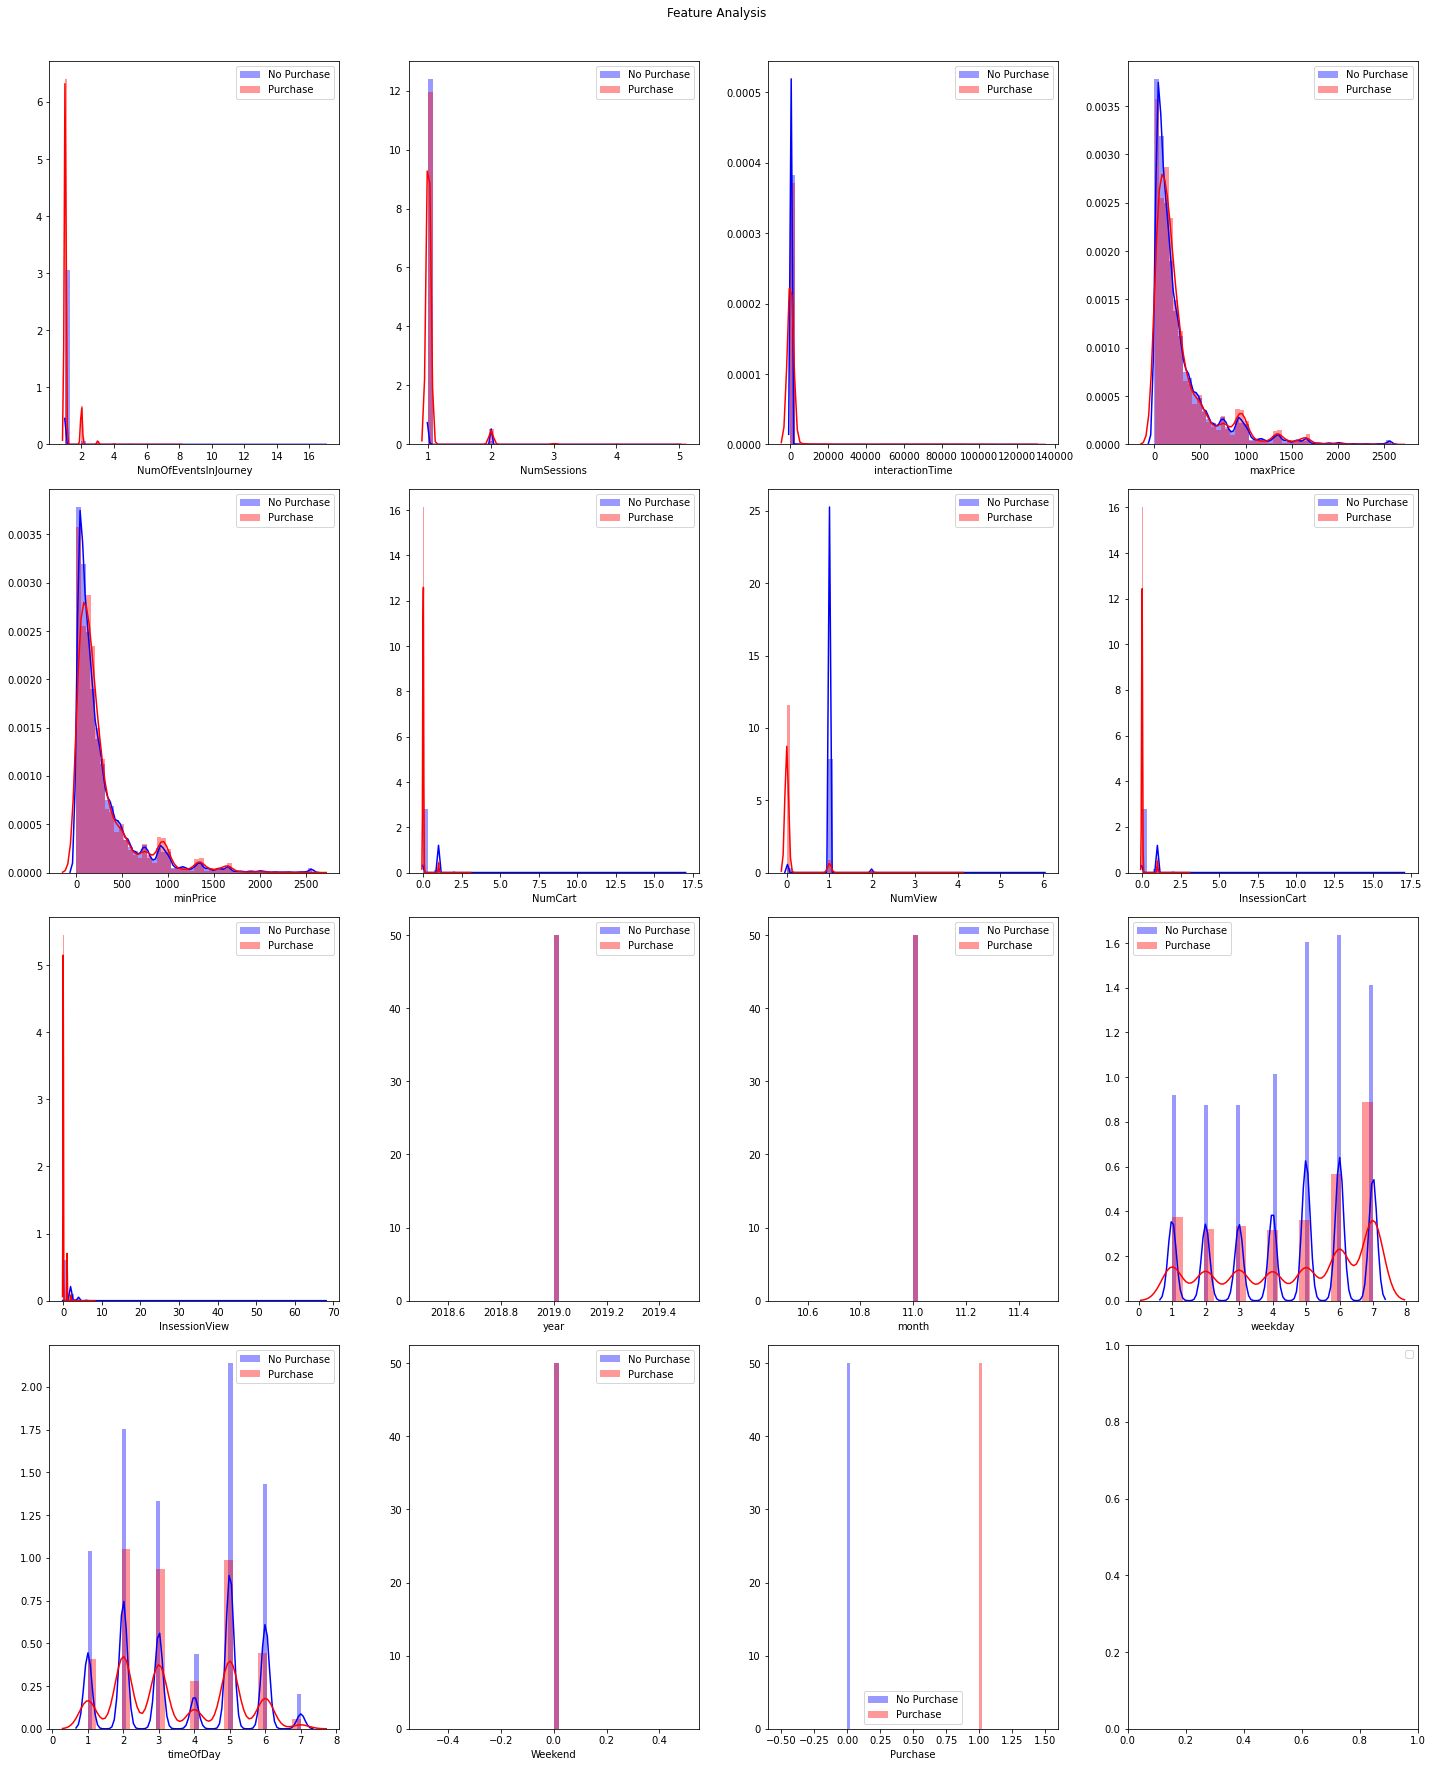

In [25]:
#Cluster 0
result = df.loc[df['cluster'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
    print(i)
    if(i<=14):
        #item=None
        sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
        sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
#     elif(i==12):
#         sb.countplot(x='weekday', hue='Purchase', data=result)
#     else:
#         sb.countplot(x='timeOfDay', hue='Purchase', data=result)
    
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

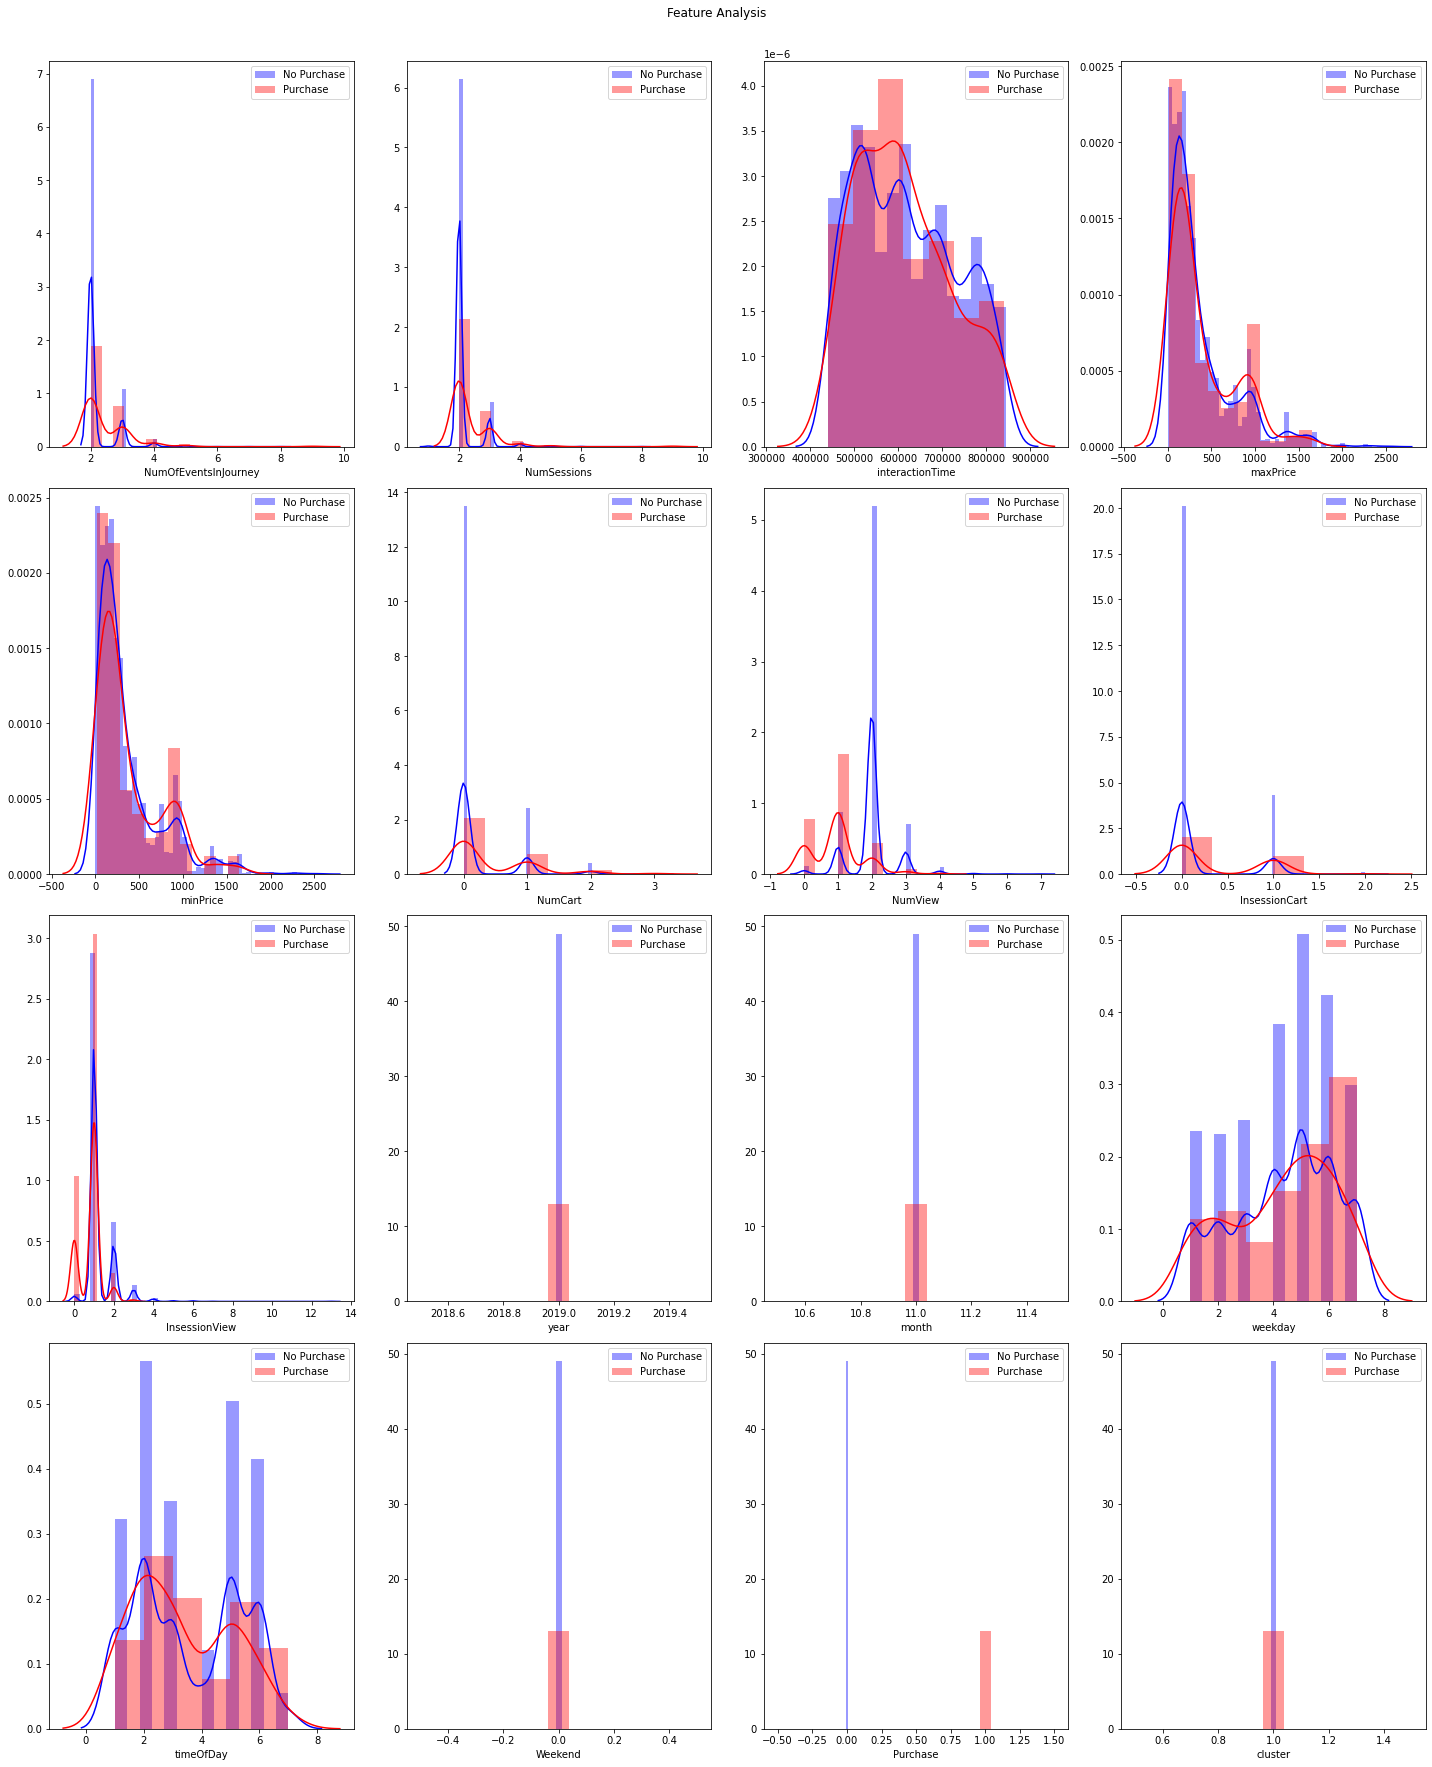

In [26]:
#Cluster 1
result = df.loc[df['cluster'] == 1]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

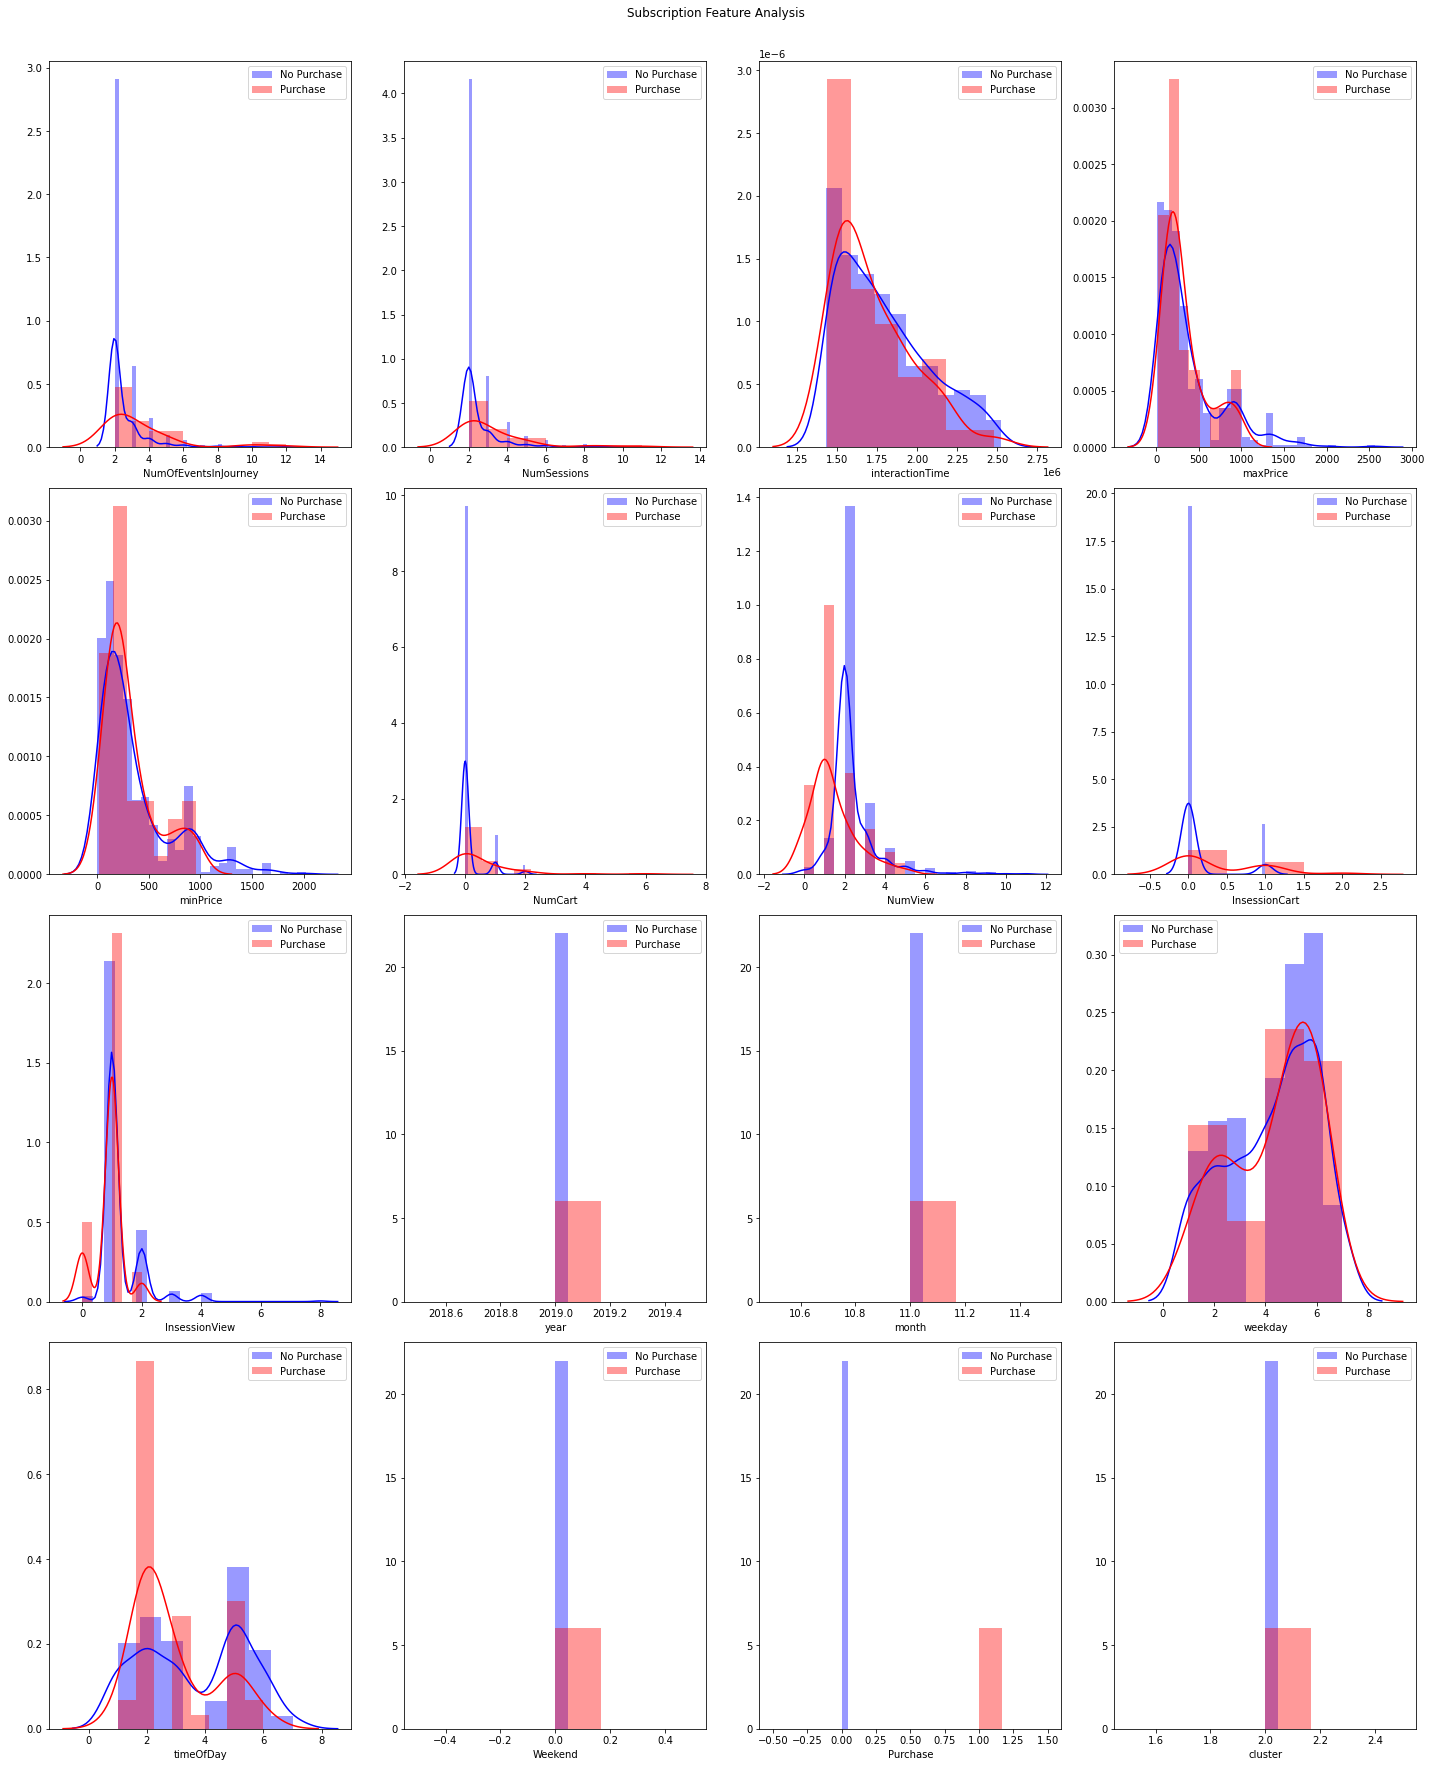

In [27]:
#Cluster 2
result = df.loc[df['cluster'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

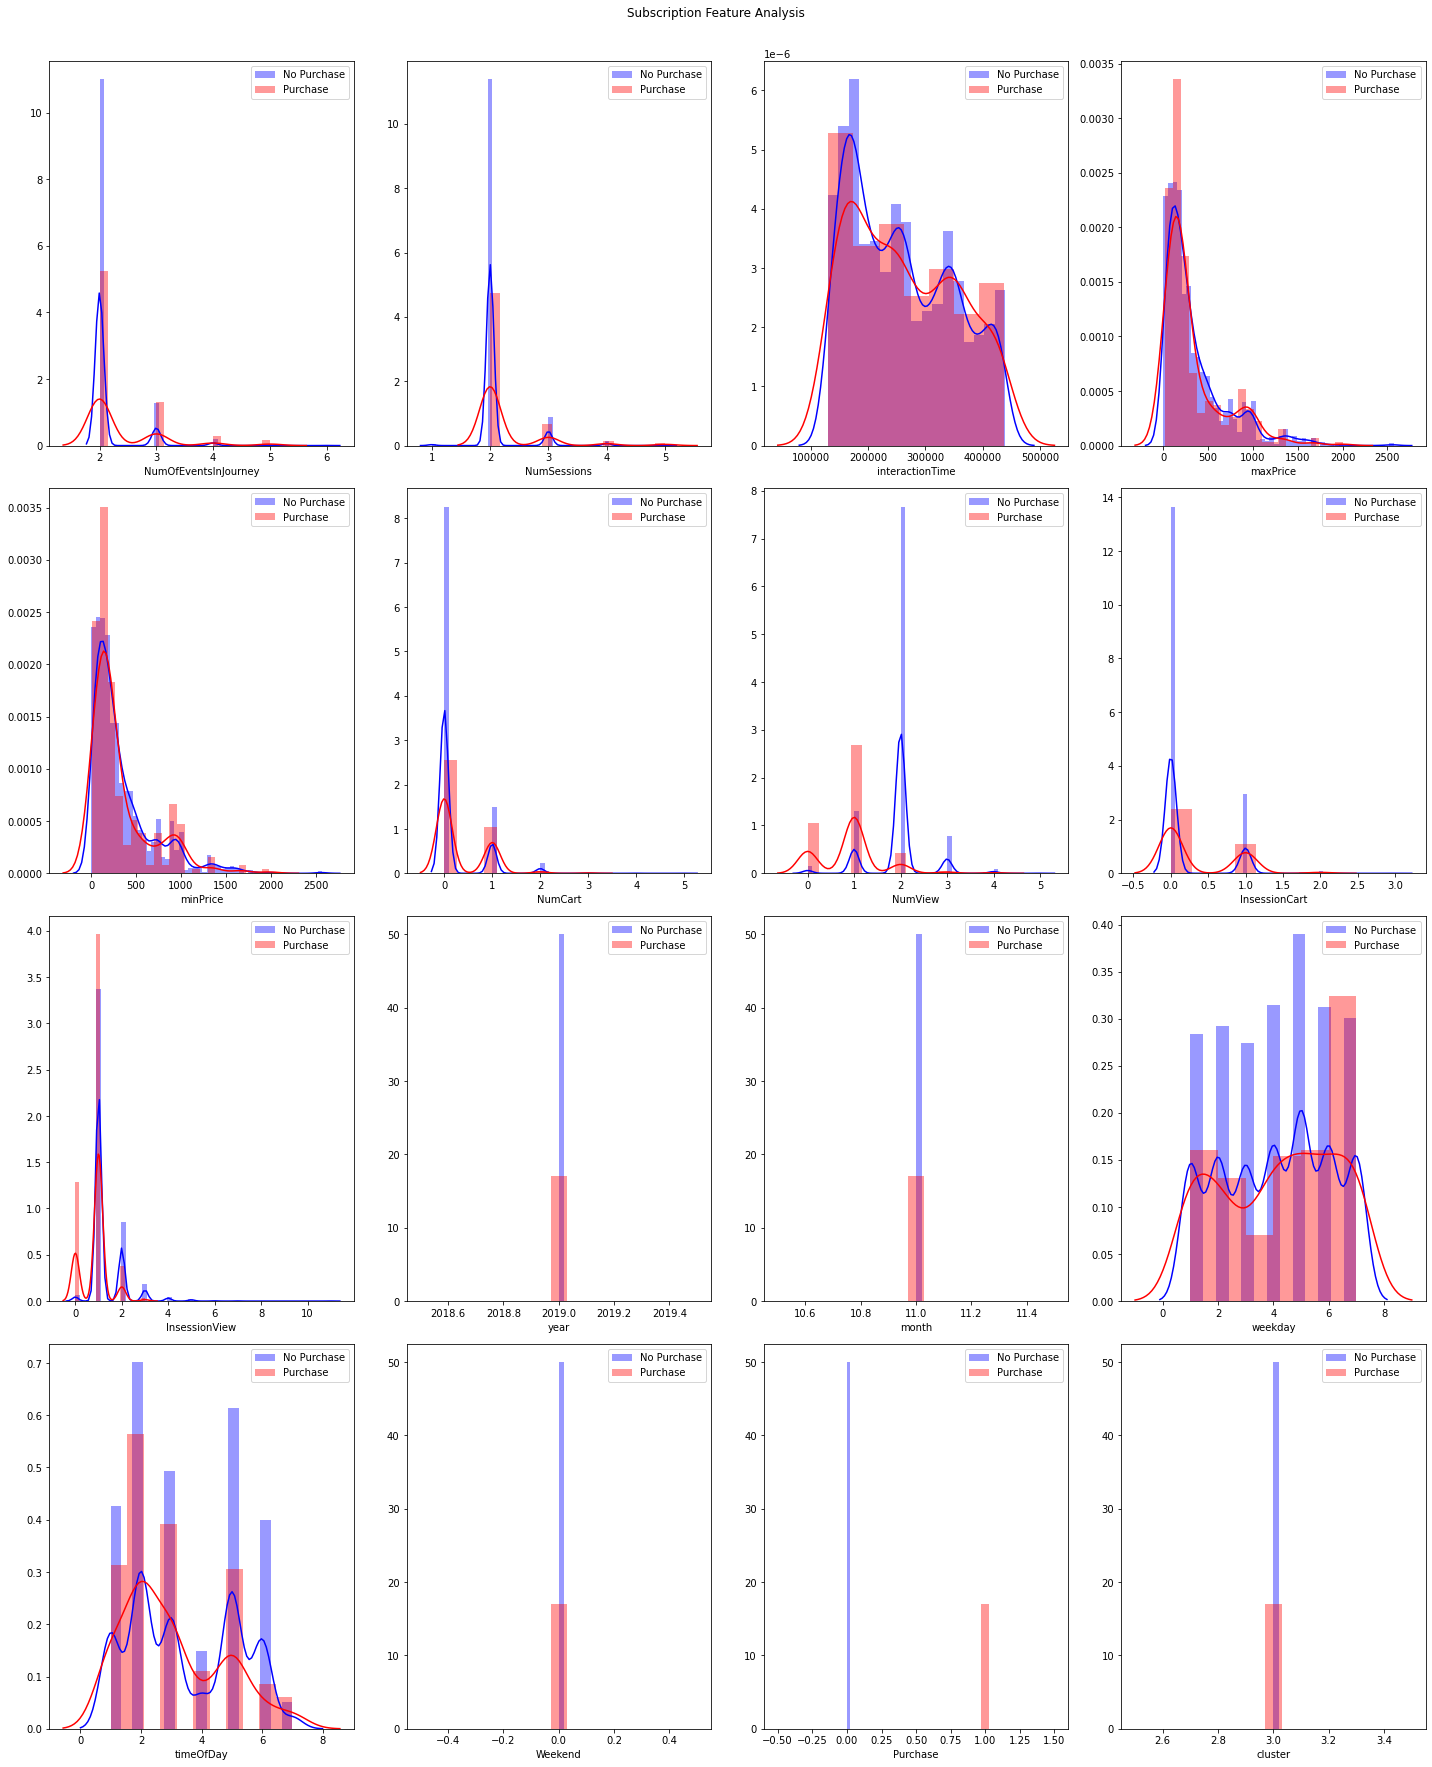

In [28]:
#Cluster 3
result = df.loc[df['cluster'] == 3]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/sohiniroy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density

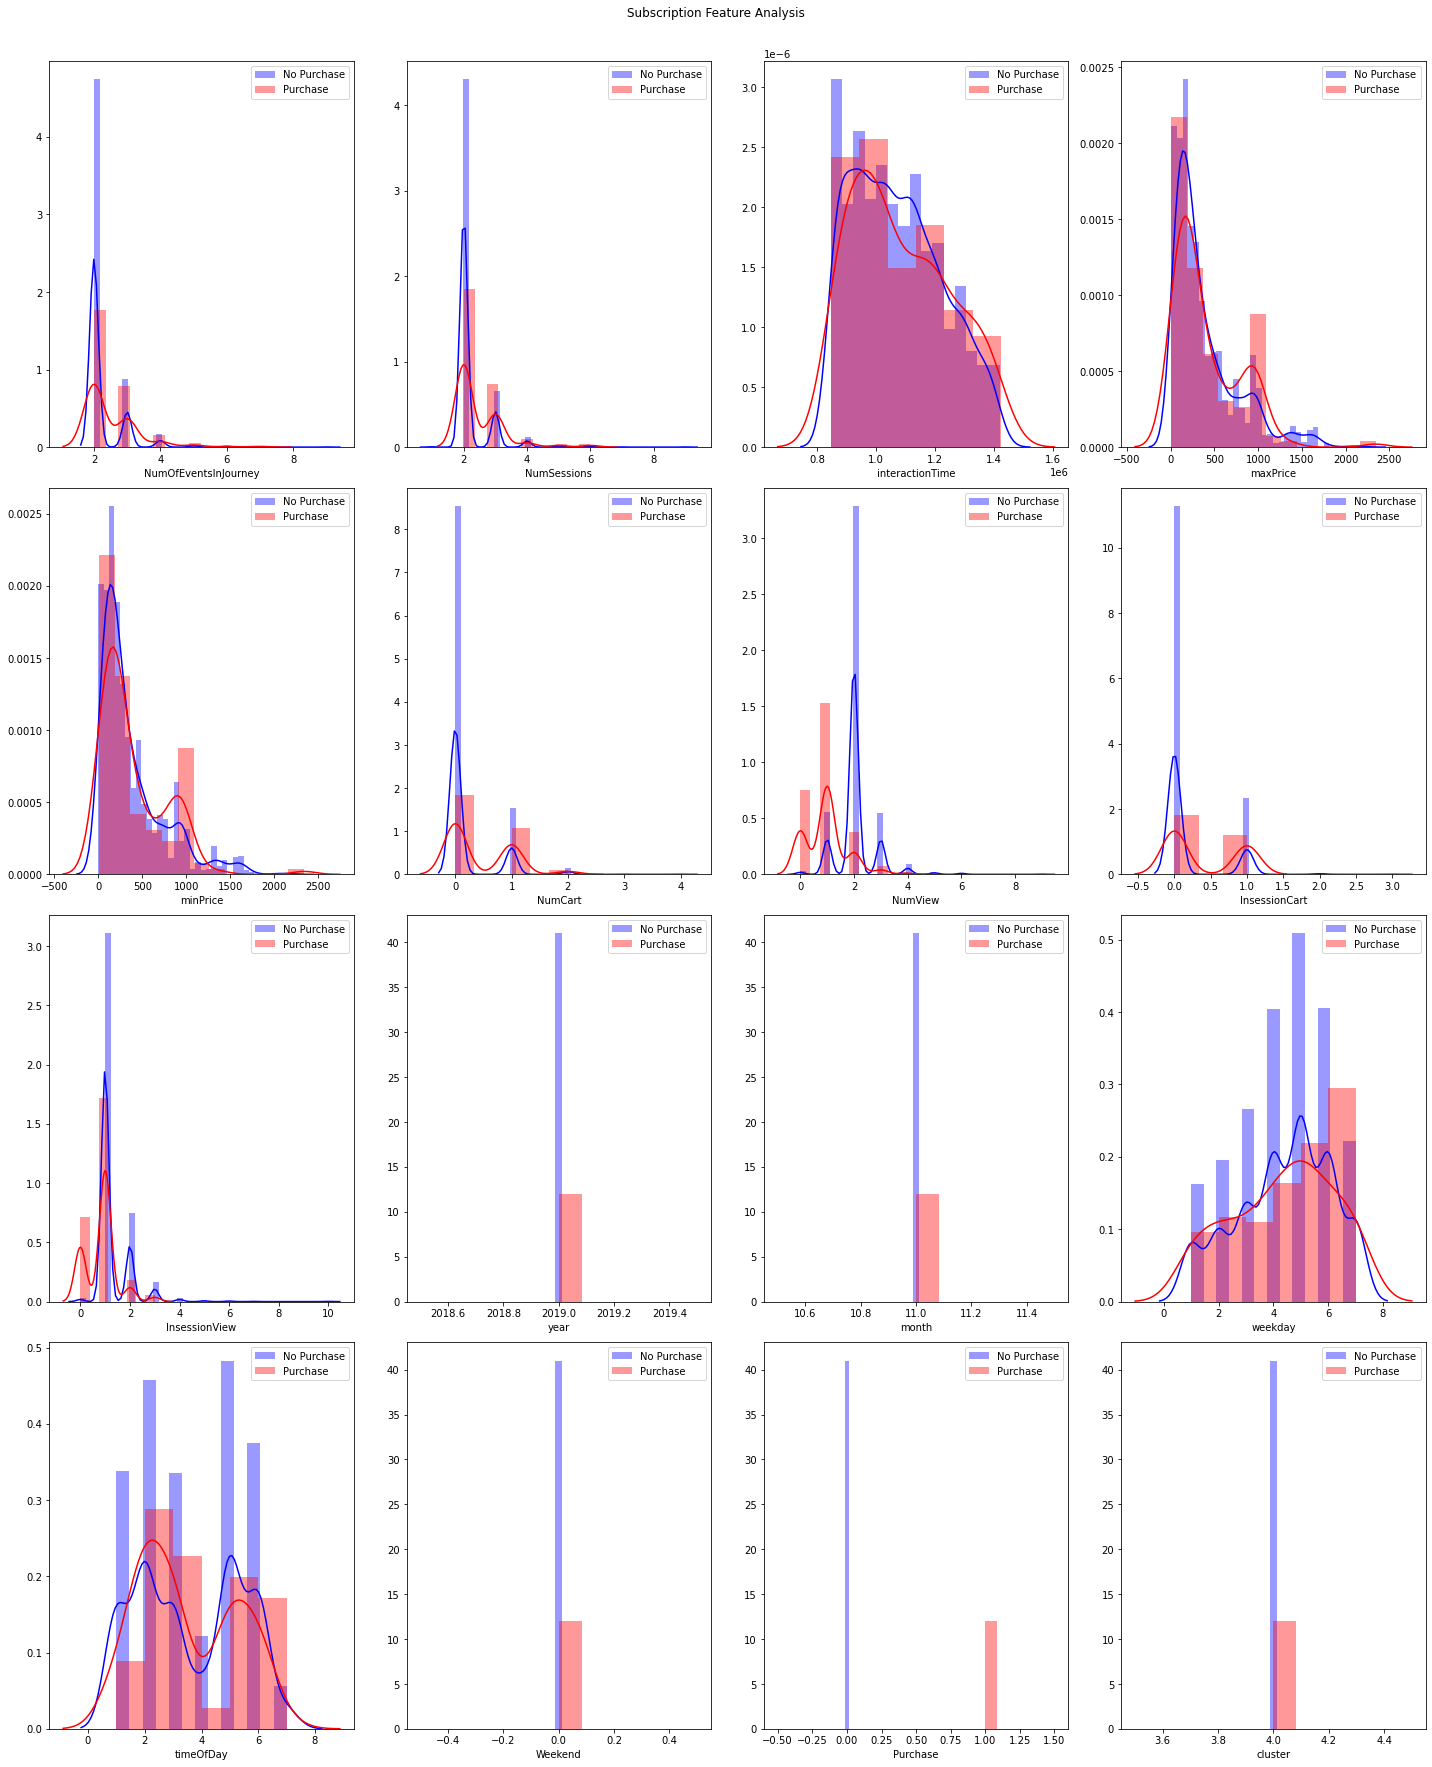

In [29]:
#Cluster 4
result = df.loc[df['cluster'] == 4]


fig = plt.figure(figsize = (20, 25))
j = 0
for i in result.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[i][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[i][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [78]:
# Now to find mean(std dev)  values for purchase vs not purchase per cluster
unique_values

array([0, 1, 2, 3, 4])

In [21]:
Table=np.zeros((14,20))
names=(df.columns.values[0:14]).astype(str)
names=pd.DataFrame(names.transpose())
for i,c in enumerate(unique_values):
    result = df.loc[df['cluster'] == c]
    purchases=np.array(result.loc[result['Purchase']==1],np.float64)
    nopurs=np.array(result.loc[result['Purchase']==0],np.float64)
    pur_means=np.mean(purchases,axis=0)
    pur_vars=np.var(purchases,axis=0)
    nopur_means=np.mean(nopurs,axis=0)
    nopur_vars=np.var(nopurs,axis=0)
    #print(i)
    #print(np.shape(pur_means[0:14]))
    Table[:,4*i]=np.reshape(pur_means[0:14],(14,))
    Table[:,(4*i)+1]=np.reshape(pur_vars[0:14],(14,))
    Table[:,(4*i)+2]=np.reshape(nopur_means[0:14],(14,))
    Table[:,(4*i)+3]=np.reshape(nopur_vars[0:14],(14,))
print(np.shape(Table))
#save all as a data frame
ALL=pd.DataFrame(Table)
ALL.insert(0, "Features", names, True) 
ALL.to_csv('electronics_var.csv')
#ALL.head()        
    

(14, 20)


In [20]:
Table=np.zeros((14,10))
names=(df.columns.values[0:14]).astype(str)
names=pd.DataFrame(names.transpose())
for i,c in enumerate(unique_values):
    result = df.loc[df['cluster'] == c]
    purchases=np.array(result.loc[result['Purchase']==1],np.float64)
    nopurs=np.array(result.loc[result['Purchase']==0],np.float64)
    pur_means=np.mean(purchases,axis=0)
    pur_vars=np.var(purchases,axis=0)
    nopur_means=np.mean(nopurs,axis=0)
    nopur_vars=np.var(nopurs,axis=0)
    #print(i)
    #print(np.shape(pur_means[0:14]))
    Table[:,2*i]=np.reshape(pur_means[0:14],(14,))
    #Table[:,(4*i)+1]=np.reshape(pur_vars[0:14],(14,))
    Table[:,(2*i)+1]=np.reshape(nopur_means[0:14],(14,))
    #Table[:,(4*i)+3]=np.reshape(nopur_vars[0:14],(14,))
print(np.shape(Table))
#save all as a data frame
ALL=pd.DataFrame(Table)
ALL.insert(0, "Features", names, True) 
ALL.to_csv('electronics_update.csv')
#ALL.head()    

(14, 10)
